<a href="https://colab.research.google.com/github/karlbehrensg/rnc-cifar10/blob/master/Red_Neuronal_Convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar las librerías necesarias

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.2.0-rc2'

## Pre procesado de datos


### Cargar el dataset  Cifar10

In [0]:
# Configurar el nombre de las clases del dataset
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [0]:
# Cargar el dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Normalización de las imágenes

In [0]:
X_train = X_train / 255.0

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test = X_test / 255.0

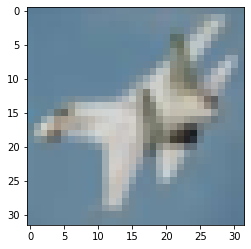

In [11]:
plt.imshow(X_test[10])

In [12]:
y_test[10]

array([0], dtype=uint8)

## Construir una red neuronal convolucional

### Definir el modelo

In [0]:
model = tf.keras.models.Sequential()

### Añadir la primera capa de convolución

Hyper parámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu
- input_shape: (32, 32, 3)


In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))


### Añadir una capa de Dropout

In [0]:
model.add(tf.keras.layers.Dropout(0.1))

### Añadir una segunda capa convolucional y la capa de max-pooling 

Hyper parámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

Hyper parámetros de la capa de MaxPool:
- pool_size: 2
- strides: 2
- padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir una capa de Dropout

In [0]:
model.add(tf.keras.layers.Dropout(0.1))

### Añadir la tercera capa convolucional

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Añadir la cuarta capa convolucional y la capa de max-pooling

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

Hyper parámetros de la capa de la MaxPool:
- pool_size: 2
- strides: 2
- padding: valid


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la capa de flattening

In [0]:
model.add(tf.keras.layers.Flatten())

### Añadir una capa de Dropout

In [0]:
model.add(tf.keras.layers.Dropout(0.1))

### Añadir la primera capa fully-connected

Hyper parámetros de la capa totalmente conectada:
- units/neurons: 128
- activation: relu

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Añadir una capa de Dropout

In [0]:
model.add(tf.keras.layers.Dropout(0.15))

### Añadir la primera capa fully-connected

Hyper parámetros de la capa totalmente conectada:
- units/neurons: 64
- activation: relu

In [0]:
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

### Añadir una capa de Dropout

In [0]:
model.add(tf.keras.layers.Dropout(0.2))

### Añadir la capa de salida

Hyper parámetros de la capa totalmente conectada:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

### Compilar el modelo

#### sparse_categorical_accuracy
sparse_categorical_accuracy comprueba si el valor verdadero maximal coincide con el índice maximal del valor de la predicción.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["sparse_categorical_accuracy"])

### Entrenar el modelo

In [31]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5739 - sparse_categorical_accuracy: 0.4245
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1418 - sparse_categorical_accuracy: 0.5966
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9671 - sparse_categorical_accuracy: 0.6627
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8619 - sparse_categorical_accuracy: 0.7000
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7865 - sparse_categorical_accuracy: 0.7246
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7360 - sparse_categorical_accuracy: 0.7460
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6882 - sparse_categorical_accuracy: 0.7619
Epoch 8/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6412 - sparse_categorical_accuracy: 0.7764
Epoch 9/15
1563/1563 [==========

### Evaluar el modelo

In [32]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7881 - sparse_categorical_accuracy: 0.7542


In [33]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7541999816894531
